In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [17]:
df = pd.read_csv("bank.csv")

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
df.shape

(11162, 17)

In [20]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [21]:
df.columns = df.columns.str.strip().str.lower()
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [22]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [24]:
target = 'deposit'
X = df.drop(columns=[target])
y = df[target]

In [25]:
y.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [26]:
df.replace('unknown', np.nan, inplace=True)
df.dropna(inplace=True)

In [27]:
X = df.drop(columns=[target])
y = df[target]

In [28]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
categorical_cols, numerical_cols

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome'],
       dtype='object'),
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42)

In [33]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)])
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred = pipe.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, pipe.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8210280373831775
Test Accuracy: 0.8336448598130841
              precision    recall  f1-score   support

          no       0.77      0.71      0.74       178
         yes       0.86      0.90      0.88       357

    accuracy                           0.83       535
   macro avg       0.82      0.80      0.81       535
weighted avg       0.83      0.83      0.83       535



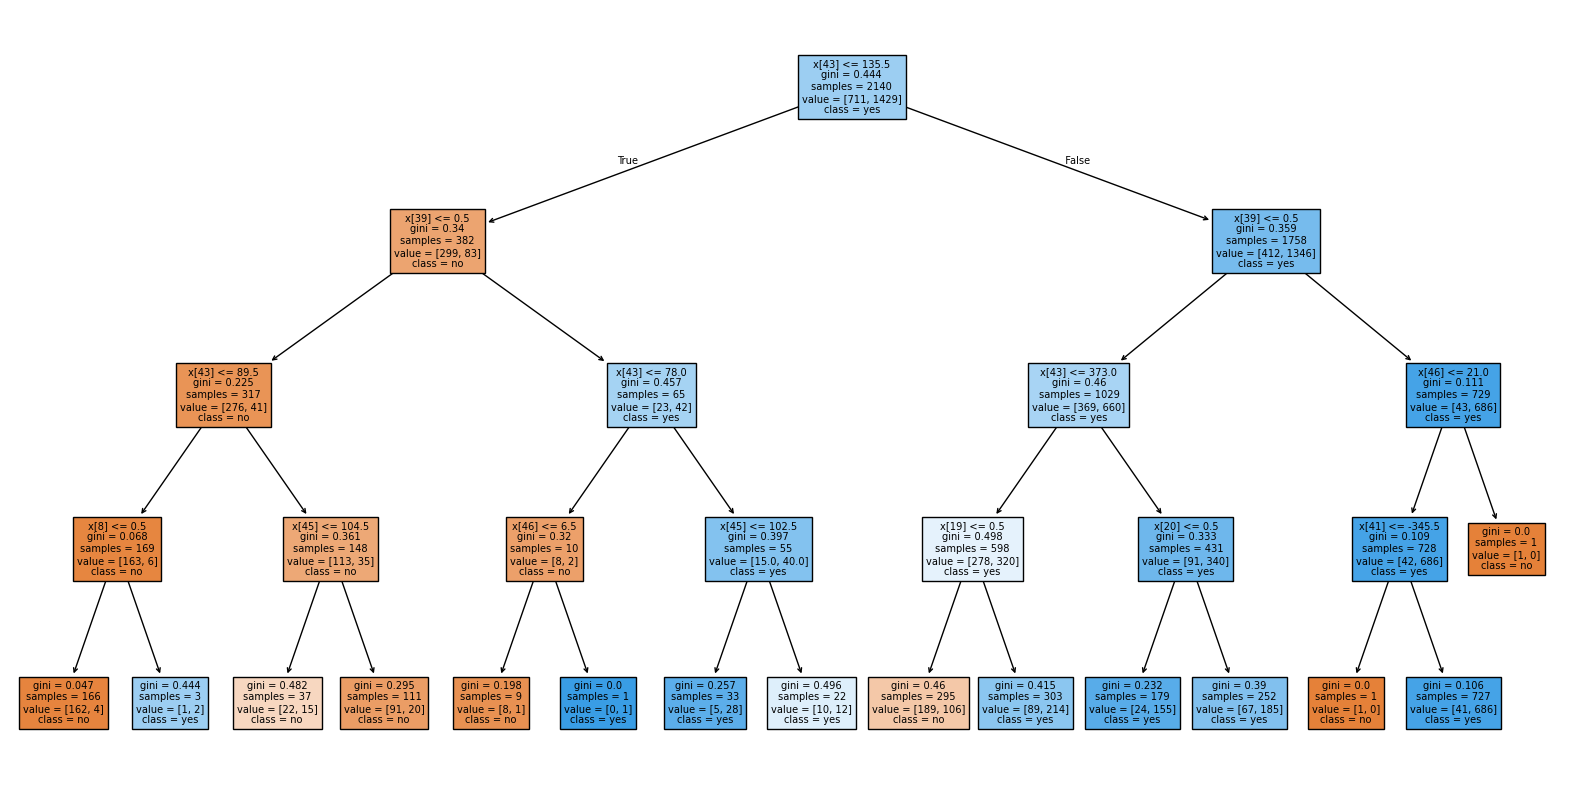

In [35]:
plt.figure(figsize=(20,10))
plot_tree(
    pipe.named_steps['model'],
    filled=True,
    class_names=['no', 'yes'])
plt.show()

In [ ]:
🌳 Key Decision Rules from the Decision Tree

Call duration is the strongest deciding factor
Customers who had longer call durations during the marketing campaign were much more likely to subscribe to the term deposit.

Previous campaign outcome matters
If a customer had a successful outcome in a previous campaign, the probability of subscription increases significantly.

Contact frequency influences decision
Customers who were contacted fewer times but with effective communication showed a higher likelihood of subscribing compared to those contacted repeatedly.